In [1]:
%pylab inline
import numpy as np
import seaborn as sns
import pandas as pd
from metasense.epa import data as epa_data
from metasense.classifiers import *
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.cross_validation import train_test_split
from datetime import datetime
from IPython.display import HTML, Javascript, display
import GPy
sns.set_style('white')

Populating the interactive namespace from numpy and matplotlib


/home/sharad/workspace/research/metasense/venv/local/lib/python2.7/site-packages/GPy/util/linalg.py:48: UserWarning: warning: caught this exception:'module' object has no attribute '_dotblas'
  warnings.warn("warning: caught this exception:" + str(e))


In [2]:
def benchmark(cf):
    error = 0
    length = len(test)
    for i, x in enumerate(test.iterrows()):
        if i == length - 1:
            continue
        prediction = cf.predict(x)
        error += sum(test.iloc[i + 1] - prediction)**2
    return error

def predict(cf, X, l):
    error = 0
    length = len(X)
    prediction = []
    for i, x in enumerate(X.iterrows()):
        if i == 0:
            prediction.append(0.0)
            continue
        prediction.append(cf.predict(x)[l])
    prediction = np.array(prediction)
    series = pd.Series(prediction, index=X.index)
    return series

In [3]:
data = epa_data.load_pandas('../data')

In [7]:
data['ozone']

,alpine,carmel mt rch,chula vista,chula_vi,del_mar,downtown,el cajon fsd,el_cajon,escondido,kearny mesa,miramar,otay mesa,otay mesa dvn,otay_mes,pendleton,san ysidro
2013-07-11 00:00:00,0.022,NaN,NaN,0.035,0.034,0.029,NaN,0.024,0.025,NaN,0.025,NaN,NaN,0.023,0.034,NaN
2013-07-11 01:00:00,0.023,NaN,NaN,0.033,0.035,NaN,NaN,0.022,0.023,NaN,NaN,NaN,NaN,0.023,NaN,NaN
2013-07-11 02:00:00,0.022,NaN,NaN,0.034,0.035,NaN,NaN,0.022,0.023,NaN,NaN,NaN,NaN,0.022,NaN,NaN
2013-07-11 03:00:00,NaN,NaN,NaN,NaN,0.034,0.027,NaN,0.022,NaN,NaN,0.022,NaN,NaN,NaN,0.032,NaN
2013-07-11 04:00:00,0.025,NaN,NaN,0.030,0.027,0.025,NaN,0.017,0.016,NaN,0.018,NaN,NaN,0.012,0.030,NaN
2013-07-11 05:00:00,0.019,NaN,NaN,0.027,0.020,0.021,NaN,0.016,0.013,NaN,0.012,NaN,NaN,0.009,0.012,NaN
2013-07-11 06:00:00,0.018,NaN,NaN,0.020,0.018,0.018,NaN,0.019,0.010,NaN,0.013,NaN,NaN,0.006,0.016,NaN
2013-07-11 07:00:00,0.026,NaN,NaN,0.016,0.025,0.020,NaN,0.023,0.015,NaN,0.015,NaN,NaN,0.006,0.025,NaN
2013-07-11 08:00:00,0.025,NaN,NaN,0.023,0.029,0.022,NaN,0.027,0.025,NaN,0.019,NaN,NaN,0.007,0.032,NaN
2013-07-11 09:00:00,0.031,NaN,NaN,0.029,0.033,0.024,NaN,0.023,0.023,NaN,0.018,NaN,NaN,0.012,0.032,NaN


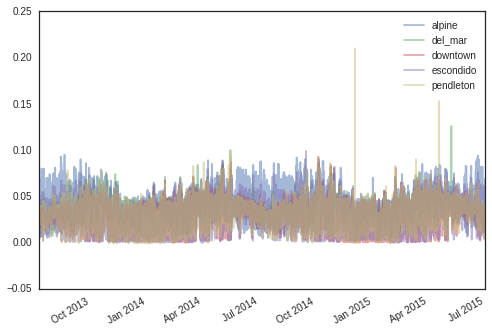

In [42]:
ozone_data = data['ozone'].dropna(thresh=15000, axis=1)
ozone_data = ozone_data.fillna(ozone_data.mean())
ozone_data.plot(alpha=0.5);
train, test = ozone_data.loc[:'2014-01-30 23:59:59'], ozone_data.loc['2015-01-01 00:00:00':]

In [47]:
cfs = {
    'Mean Classifier': MeanClassifier(),
    #'Month Classifier': MonthClassifier(),
    'Linear Classifier': LinearClassifier(),
    'Lasso Classifier': LassoClassifier(alpha=0.00001),
    #'Gaussian Process': GPClassifier(length_scale=0.001)
}
for name, cf in cfs.iteritems():
    cf.fit(train)
    print "%s: %f" % (name, benchmark(cf))

Lasso Classifier: 5.562658
Linear Classifier: 2.009098
Mean Classifier: 20.547047


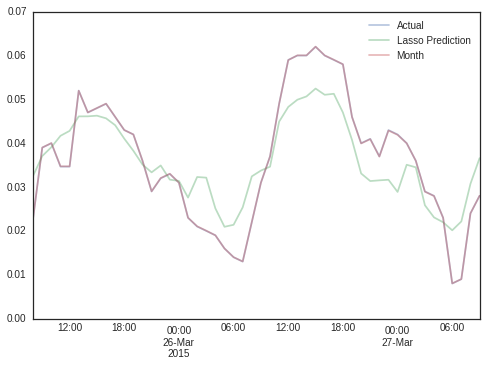

In [46]:
def plot(loc, start=0, end=20000):
    test[loc][start:end].plot(alpha=0.4, label='Actual')
    predict(cfs['Lasso Classifier'], test, test.keys().tolist().index(loc))[start:end].plot(alpha=0.4, label='Lasso Prediction')
    predict(cfs['Linear Classifier'], test, test.keys().tolist().index(loc))[start:end].plot(alpha=0.4, label='Month')
plot('del_mar', start=2000, end=2050)
legend()

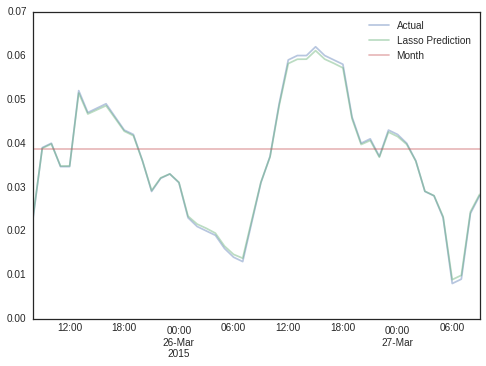

In [44]:
train

,alpine,del_mar,downtown,escondido,pendleton
2013-07-11 00:00:00,0.037766,0.031868,0.026804,0.028048,0.030624
2013-07-11 01:00:00,0.037766,0.031868,0.026804,0.028048,0.030624
2013-07-11 02:00:00,0.037766,0.031868,0.026804,0.028048,0.030624
2013-07-11 03:00:00,0.037766,0.031868,0.026804,0.028048,0.030624
2013-07-11 04:00:00,0.037766,0.031868,0.026804,0.028048,0.030624
2013-07-11 05:00:00,0.037766,0.031868,0.026804,0.028048,0.030624
2013-07-11 06:00:00,0.037766,0.031868,0.026804,0.028048,0.030624
2013-07-11 07:00:00,0.037766,0.031868,0.026804,0.028048,0.030624
2013-07-11 08:00:00,0.037766,0.031868,0.026804,0.028048,0.030624
2013-07-11 09:00:00,0.037766,0.031868,0.026804,0.028048,0.030624
